# Gerando página web para comparação de matrizes
Importando dados do GitHub


In [71]:
import pandas as pd

# Pegando os dados diretamente do git
url_humano = 'https://raw.githubusercontent.com/Red-of-Pallet/Estudo/dataScience/dataScience/visualizacao-de-dados-com-python/data/human.fasta'
url_bacteria = 'https://raw.githubusercontent.com/Red-of-Pallet/Estudo/dataScience/dataScience/visualizacao-de-dados-com-python/data/bacteria.fasta'

# Extraindo sequencia do Humano
df_humano = pd.read_csv(url_humano, header=0, skiprows=1, names=['sequence'])
humano = ''.join(df_humano['sequence'].tolist())

# Extraindo sequencia da Bacteria
df_bacteria = pd.read_csv(url_bacteria, header=0, skiprows=1, names=['sequence'])
bacteria = ''.join(df_bacteria['sequence'].tolist())

print("Humano: {}".format(humano))
print("Bacteria: {}".format(bacteria))

Humano: CGCGTCGGGGCCTCGCCGCGCTCTACCTACCTACCTGGTTGATCCTGCCAGTAGCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTAAGTACGCACGGCCGGTACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATGGTTCCTTTGGTCGCTCGCTCCTCTCCTACTTGGATAACTGTGGTAATTCTAGAGCTAATACATGCCGACGGGCGCTGACCCCCTTCGCGGGGGGGATGCGTGCATTTATCAGATCAAAACCAACCCGGTCAGCCCCTCTCCGGCCCCGGCCGGGGGGCGGGCCGCGGCGGCTTTGGTGACTCTAGATAACCTCGGGCCGATCGCACGCCCCCCGTGGCGGCGACGACCCATTCGAACGTCTGCCCTATCAACTTTCGATGGTAGTCGCCGTGCCTACCATGGTGACCACGGGTGACGGGGAATCAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCACTCCCGACCCGGGGAGGTAGTGACGAAAAATAACAATACAGGACTCTTTCGAGGCCCTGTAATTGGAATGAGTCCACTTTAAATCCTTTAACGAGGATCCATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCCGAGCCGCCTGGATACCGCAGCTAGGAATAATGGAATAGGACCGCGGTTCTATTTTGTTGGTTTTCGGAACTGAGGCCATGATTAAGAGGGACGGCCGGGGGCATTCGTATTGCGCCGCTAGAGGTG

In [74]:
from itertools import product

valores = ['A', 'T', 'G', 'C']
combinacoes = product(valores, repeat=2)

# Criar dicionário vazio
rna_humano = {}
rna_bacteria = {}

# Atribuir nome e posição para cada combinação na matriz
i = 0
for combinacao in combinacoes:
  nome_combinacao = ''.join(combinacao)  # Converter combinação em string
  rna_humano[nome_combinacao] = 0
  rna_bacteria[nome_combinacao] = 0
  i += 1

try:
  for i in range(len(humano)-1):
      rna_humano[humano[i] + humano[i+1]] += 1
except:
  print("Erro na contagem humana")


try:
  for i in range(len(bacteria)-1):
    rna_bacteria[bacteria[i] + bacteria[i+1]] += 1
except:
  print("Erro na contagem bacteriana")

print(rna_humano)
print(rna_bacteria)

Contagem humana concluida
Contagem bacteriana concluida
{'AA': 116, 'AT': 95, 'AG': 112, 'AC': 97, 'TA': 85, 'TT': 112, 'TG': 110, 'TC': 100, 'GA': 133, 'GT': 99, 'GG': 178, 'GC': 148, 'CA': 87, 'CT': 101, 'CG': 158, 'CC': 167}
{'AA': 99, 'AT': 60, 'AG': 105, 'AC': 81, 'TA': 62, 'TT': 54, 'TG': 103, 'TC': 57, 'GA': 108, 'GT': 90, 'GG': 141, 'GC': 102, 'CA': 76, 'CT': 72, 'CG': 93, 'CC': 73}


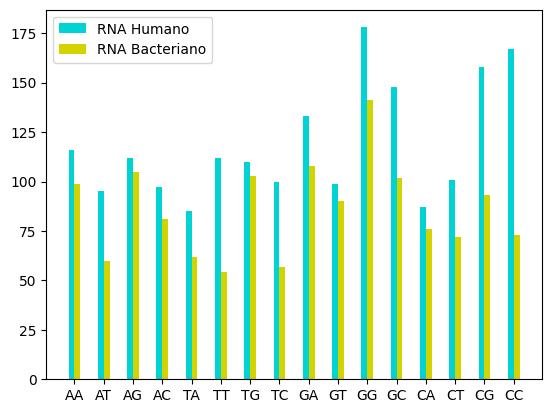

In [95]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(len(rna_humano.keys()))
width = 0.2
labels = rna_humano.keys()

bar_humano = plt.bar(ind, rna_humano.values(), width, color='#00d3d3', label="RNA Humano")
bar_bacteria = plt.bar(ind+width, rna_bacteria.values(), width, color='#d3d300', label="RNA Bacteriano")

location = ind+width/2
plt.xticks(location, labels)
plt.legend()